#Importing

In [5]:
from google.colab import drive
from PIL import Image
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ah2.mat to ah2.mat
Saving lb2.mat to lb2.mat
Saving lp2.mat to lp2.mat
Saving X2.mat to X2.mat
Saving Y2.mat to Y2.mat
User uploaded file "ah2.mat" with length 289453 bytes
User uploaded file "lb2.mat" with length 301641 bytes
User uploaded file "lp2.mat" with length 308567 bytes
User uploaded file "X2.mat" with length 9742 bytes
User uploaded file "Y2.mat" with length 169994 bytes


In [7]:
from mat4py import loadmat
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import scipy
import pandas as pd


import seaborn as sns
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score


#Installation

In [1]:
pip install geopandas

     |████████████████████████████████| 994 kB 15.4 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 6.6 MB 47.6 MB/s 


In [2]:
pip install rioxarray

     |████████████████████████████████| 45 kB 2.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 69 kB/s 
  Created wheel for rioxarray: filename=rioxarray-0.6.1-py3-none-any.whl size=53248 sha256=d200049031c3bc3ea009efaac9898227470be3f6ca97e7c61595719334a0ecc9
  Stored in directory: /root/.cache/pip/wheels/a8/30/1c/78957e628ce5cc7f7109627c13624881a82efac11d28e96fef
Successfully built rioxarray


In [3]:
pip install earthpy

     |████████████████████████████████| 1.4 MB 12.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for earthpy: filename=earthpy-0.9.2-py3-none-any.whl size=1365097 sha256=d934a5d54b7fa5c5bd4a6afc249161fe0af92c3a9a59d3586ad84c4589380a22
  Stored in directory: /root/.cache/pip/wheels/80/4d/12/9d924aa338ecb211c35e6fff47330e3f6d14b8c74971c527ca
Successfully built earthpy


In [4]:
pip install mat4py

#Band_1:Temperature

In [8]:
#Way to open tif file and look up its coordinates
#Band_1:temperature
landsat_temp_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/LST_night_2018utm49n_newdata_deployed_2 8.tif")
band_1 = rxr.open_rasterio(landsat_temp_path, masked=True)
band_1.shape

band_1.coords

Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6.025e+05 6.035e+05 ... 8.815e+05 8.825e+05
  * y            (y) float64 2.635e+06 2.634e+06 ... 2.419e+06 2.418e+06
    spatial_ref  int64 0

In [9]:
tempX = band_1.coords['x']

In [10]:
tempY = band_1.coords['y']

In [11]:
tempX[69]

<xarray.DataArray 'x' ()>
array(671504.163)
Coordinates:
    x            float64 6.715e+05
    spatial_ref  int64 0

In [12]:
tempX

<xarray.DataArray 'x' (x: 281)>
array([602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
       882504.163])
Coordinates:
  * x            (x) float64 6.025e+05 6.035e+05 ... 8.815e+05 8.825e+05
    spatial_ref  int64 0

In [13]:
tempX[159]

<xarray.DataArray 'x' ()>
array(761504.163)
Coordinates:
    x            float64 7.615e+05
    spatial_ref  int64 0

In [14]:
tempY[159]

<xarray.DataArray 'y' ()>
array(2476258.89)
Coordinates:
    y            float64 2.476e+06
    spatial_ref  int64 0

In [15]:
tempY[69]

<xarray.DataArray 'y' ()>
array(2566258.89)
Coordinates:
    y            float64 2.566e+06
    spatial_ref  int64 0

#Load data from Temperature image, and Definition of Xstart and Ystart

In [64]:
Xstart = 602504.163

In [65]:
Ystart = 2635258.89

In [66]:
tempX.shape

(281,)

In [67]:
tempY.shape

(218,)

In [68]:
tempX[0]

<xarray.DataArray 'x' ()>
array(602504.163)
Coordinates:
    x            float64 6.025e+05
    spatial_ref  int64 0

In [69]:
tempX[-1]

<xarray.DataArray 'x' ()>
array(882504.163)
Coordinates:
    x            float64 8.825e+05
    spatial_ref  int64 0

In [70]:
tempY[0]

<xarray.DataArray 'y' ()>
array(2635258.89)
Coordinates:
    y            float64 2.635e+06
    spatial_ref  int64 0

In [71]:
tempX[182]

<xarray.DataArray 'x' ()>
array(784504.163)
Coordinates:
    x            float64 7.845e+05
    spatial_ref  int64 0

In [72]:
tempY[148]

<xarray.DataArray 'y' ()>
array(2487258.89)
Coordinates:
    y            float64 2.487e+06
    spatial_ref  int64 0

In [73]:
np.where(tempX > 694487)

(array([ 92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
        196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
        209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
        222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
        235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
        248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
        261, 262, 263, 264, 265, 266, 267, 268, 269

In [74]:
np.where(tempY < 2577747)

(array([ 58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
        175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
        188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
        201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
        214, 215, 216, 217]),)

In [75]:
#Temperature image on 2018 night
NightImage = band_1.data[0,:,:]

In [76]:
NightImage.shape

(218, 281)

In [77]:
selectedTemp = NightImage[:,:] #The smaller range

In [78]:
selectedTemp.shape

(218, 281)

In [79]:
selectedTemp.shape

(218, 281)

In [80]:
valTemp = selectedTemp[selectedTemp > 250]

In [81]:
valTemp.shape

(48243,)

In [82]:
print(np.var(valTemp))

1.9958669242197362


In [83]:
selectedTemp.shape

(218, 281)

In [84]:
selectedTemp

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        , 293.70150411, 292.50393307, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 294.37163197, 292.493433  , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 293.1674943 , 292.18214956, ...,   0.        ,
          0.        ,   0.        ]])

In [85]:
np.array(np.where(selectedTemp < 289.7)).shape

(2, 18028)

In [86]:
largeTemp = selectedTemp[selectedTemp > 250]

In [87]:
np.where(largeTemp < 290)

(array([   20,    21,    22, ..., 47817, 47863, 48198]),)

In [88]:
np.array(np.where(selectedTemp > 290)).shape

(2, 40268)

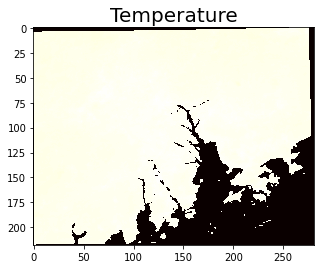

In [89]:
plt.title("Temperature", fontsize =20)
plt.imshow(NightImage, cmap='hot', interpolation='nearest')
plt.show()

NameError: ignored

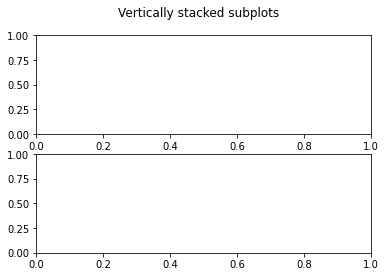

In [90]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)

In [ ]:
fig = plt.figure()

# create a 2 X 2 grid 
gs = grd.GridSpec(2, 2, height_ratios=[1,10], width_ratios=[6,1], wspace=0.1)

# image plot
ax = plt.subplot(gs[2])
p = ax.imshow(v1,interpolation='nearest',aspect='auto') # set the aspect ratio to auto to fill the space. 
plt.xlabel('Day')
plt.ylabel('Depth')
plt.xlim(1,140)

# color bar in it's own axis
colorAx = plt.subplot(gs[3])
cb = plt.colorbar(p, cax = colorAx)
cb.set_label('RWU')

# line plot
ax2 = plt.subplot(gs[0])

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.set_yticks([0,1])
x=np.arange(1,151,1)
ax2.plot(x,v2,'k',lw=0.5)
plt.xlim(1,140)
plt.ylim(0,1.1)

plt.show()

In [ ]:

plt.title("LST PRD - domain of interest", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(tempX,tempY,NightImage,vmin=260,vmax=300)
plt.colorbar(anchor=(250, 300))
plt.show()

plt.title("Impervious Percentage", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(tempX,tempY,imperviousData)
plt.colorbar(anchor=(250, 300))
plt.show()

plt.title("Impervious Percentage", fontsize =10)
plt.xlabel('x')
plt.ylabel('y')
plt.pcolormesh(tempX,tempY,imperviousData)
plt.colorbar(anchor=(250, 300))
plt.show()

from google.colab import files
plt.savefig("abc.png")
files.download("abc.png") 

In [ ]:
sns.heatmap(imperviousData)

In [ ]:
sns.heatmap(selectedTemp)

In [ ]:
plt.imshow(selectedTerrian, cmap='hot', interpolation='nearest')
plt.title('Impervious')
plt.show()

In [ ]:
selectedTerrian

In [ ]:
plt.title("Impervious", fontsize =20)
sns.heatmap(imperviousData)

In [ ]:
plt.imshow(imageImpervious[3376:(3376+2*imperviousYinter), 3806:(3806+2*imperviousXinter)], cmap='hot', interpolation='nearest')
plt.title('Impervious')
plt.show()

#Band_2:Impervious_surface_percentage

In [169]:
landsat_temp_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/gmis_impervious_surface_percentage_geographic_1000mutm[5706].tif")
band_2 = rxr.open_rasterio(landsat_temp_path, masked=True)
band_2.shape
band_2.coords

Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.656e+05 5.666e+05 ... 9.203e+05 9.213e+05
  * y            (y) float64 2.689e+06 2.688e+06 ... 2.366e+06 2.365e+06
    spatial_ref  int64 0

In [170]:
arrayX = np.array(band_2.coords['x'])

arrayY = np.array(band_2.coords['y'])

In [171]:
arrayX.shape

(357,)

In [172]:
arrayY.shape

(325,)

In [173]:
imageImper = openImageArr('/content/drive/MyDrive/Colab Notebooks/gmis_impervious_surface_percentage_geographic_1000mutm[5706].tif')
imperviousData = imageImper[54:272,37:318]

In [174]:
np.where(arrayX > 602504.163 + 281000)
#End of band_2 inspections

(array([319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331,
        332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
        345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356]),)

In [175]:
arrayX[129]

694512.0951656862

#Band_3:Population

In [91]:
#Inspect the Population data
landsat_temp_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/population.tif")
band_3 = rxr.open_rasterio(landsat_temp_path, masked=True)
band_3.shape
band_3.coords

Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.656e+05 5.666e+05 ... 9.196e+05 9.206e+05
  * y            (y) float64 2.689e+06 2.688e+06 ... 2.366e+06 2.365e+06
    spatial_ref  int64 0

In [92]:
arrX3 = band_3.coords['x']
arrY3 = band_3.coords['y']

In [93]:
arrX3

<xarray.DataArray 'x' (x: 356)>
array([565621.771, 566621.771, 567621.771, ..., 918621.771, 919621.771,
       920621.771])
Coordinates:
  * x            (x) float64 5.656e+05 5.666e+05 ... 9.196e+05 9.206e+05
    spatial_ref  int64 0

In [94]:
arrY3

<xarray.DataArray 'y' (y: 325)>
array([2689409.76, 2688409.76, 2687409.76, ..., 2367409.76, 2366409.76,
       2365409.76])
Coordinates:
  * y            (y) float64 2.689e+06 2.688e+06 ... 2.366e+06 2.365e+06
    spatial_ref  int64 0

In [95]:
np.where(arrX3 > Xstart)

(array([ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
         63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
         76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
         89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
        180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
        193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
        206, 207, 208, 209, 210, 211, 212, 213, 214

In [96]:
np.where(arrY3 > (Ystart))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]),)

In [97]:
arrY3.shape

(325,)

In [98]:
arrX3[106]

<xarray.DataArray 'x' ()>
array(671621.771)
Coordinates:
    x            float64 6.716e+05
    spatial_ref  int64 0

In [99]:
arrY3[213]

<xarray.DataArray 'y' ()>
array(2476409.76)
Coordinates:
    y            float64 2.476e+06
    spatial_ref  int64 0

In [100]:
arrY3[213]

<xarray.DataArray 'y' ()>
array(2476409.76)
Coordinates:
    y            float64 2.476e+06
    spatial_ref  int64 0

In [101]:
PstartY = 54
PstartX = 37

In [102]:
#End of band_3:population inspection

#Band_4:Terrain

In [103]:
#Band_4:Terrain
landsat_temp_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/terrain.tif")
band_4 = rxr.open_rasterio(landsat_temp_path, masked=True)
band_4.shape

(1, 278, 308)

In [104]:
arrX4 = band_4.coords['x']
arrY4 = band_4.coords['y']

In [105]:
arrX4

<xarray.DataArray 'x' (x: 308)>
array([588462.032, 589462.032, 590462.032, ..., 893462.032, 894462.032,
       895462.032])
Coordinates:
  * x            (x) float64 5.885e+05 5.895e+05 ... 8.945e+05 8.955e+05
    spatial_ref  int64 0

In [106]:
arrY4

<xarray.DataArray 'y' (y: 278)>
array([2666072.21, 2665072.21, 2664072.21, ..., 2391072.21, 2390072.21,
       2389072.21])
Coordinates:
  * y            (y) float64 2.666e+06 2.665e+06 ... 2.39e+06 2.389e+06
    spatial_ref  int64 0

In [107]:
np.where(arrX4 > Xstart + 281000)

(array([296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307]),)

In [108]:
np.where(arrY4 > Ystart - 218000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [109]:
arrX4[83]

<xarray.DataArray 'x' ()>
array(671462.032)
Coordinates:
    x            float64 6.715e+05
    spatial_ref  int64 0

In [110]:
np.where(arrY4 > Ystart)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),)

In [111]:
arrY4[190]

<xarray.DataArray 'y' ()>
array(2476072.21)
Coordinates:
    y            float64 2.476e+06
    spatial_ref  int64 0

In [112]:
arrY4[190]

<xarray.DataArray 'y' ()>
array(2476072.21)
Coordinates:
    y            float64 2.476e+06
    spatial_ref  int64 0

In [113]:
TstartY = 30
TstartX = 15

#Band_5:forest height

In [114]:
#Band5-forest height

landsat_temp_path = os.path.join("/content/drive/MyDrive/Colab Notebooks/Forest_height_2019_SASIAutm49n.tif")
band_5 = rxr.open_rasterio(landsat_temp_path, masked=True)
band_5.shape
band_5.coords


Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6.025e+05 6.035e+05 6.045e+05 ... 8.81e+05 8.82e+05
  * y            (y) float64 2.636e+06 2.635e+06 ... 2.42e+06 2.419e+06
    spatial_ref  int64 0

In [115]:
arrX5 = band_5.coords['x']
arrY5 = band_5.coords['y']

In [116]:
arrY5.shape

(217,)

In [117]:
arrX5[0]

<xarray.DataArray 'x' ()>
array(602486.47311179)
Coordinates:
    x            float64 6.025e+05
    spatial_ref  int64 0

In [118]:
arrY5[0]

<xarray.DataArray 'y' ()>
array(2635549.0867159)
Coordinates:
    y            float64 2.636e+06
    spatial_ref  int64 0

In [119]:
Ystart

2635258.89

In [120]:
Xstart

602504.163

In [121]:
arrY5

<xarray.DataArray 'y' (y: 217)>
array([2635549.086716, 2634547.818348, 2633546.549979, ..., 2421277.655921,
       2420276.387552, 2419275.119184])
Coordinates:
  * y            (y) float64 2.636e+06 2.635e+06 ... 2.42e+06 2.419e+06
    spatial_ref  int64 0

In [122]:
np.where(arrX5 > Xstart)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [123]:
np.where(arrY5 > Ystart - 218000)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [124]:
arrX5[69]

<xarray.DataArray 'x' ()>
array(671602.78113821)
Coordinates:
    x            float64 6.716e+05
    spatial_ref  int64 0

In [125]:
arrY5[159]

<xarray.DataArray 'y' ()>
array(2476347.41617166)
Coordinates:
    y            float64 2.476e+06
    spatial_ref  int64 0

In [126]:
FstartY = 0
FstartX = 0

#Preperation of Y

In [127]:
selectedTempX = tempX[:] #(59+1):(159+1)
dataX = ([selectedTempX,]*218)
dataX = np.array(dataX)
dataX

array([[602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
        882504.163],
       [602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
        882504.163],
       [602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
        882504.163],
       ...,
       [602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
        882504.163],
       [602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
        882504.163],
       [602504.163, 603504.163, 604504.163, ..., 880504.163, 881504.163,
        882504.163]])

In [128]:
selectedTempY = tempY[:] #(59+1):(159+1)
dataY = ([selectedTempY,]*281)
dataY = np.array(dataY)
dataY = dataY.transpose()

In [129]:
dataY

array([[2635258.89, 2635258.89, 2635258.89, ..., 2635258.89, 2635258.89,
        2635258.89],
       [2634258.89, 2634258.89, 2634258.89, ..., 2634258.89, 2634258.89,
        2634258.89],
       [2633258.89, 2633258.89, 2633258.89, ..., 2633258.89, 2633258.89,
        2633258.89],
       ...,
       [2420258.89, 2420258.89, 2420258.89, ..., 2420258.89, 2420258.89,
        2420258.89],
       [2419258.89, 2419258.89, 2419258.89, ..., 2419258.89, 2419258.89,
        2419258.89],
       [2418258.89, 2418258.89, 2418258.89, ..., 2418258.89, 2418258.89,
        2418258.89]])

In [130]:
dataY.shape

(218, 281)

In [131]:
#Final checking before use
dataY.shape

(218, 281)

#Loading lp2

In [132]:
datalp = loadmat('lp2.mat')
dataah = loadmat('ah2.mat')
datalb = loadmat('lb2.mat')
lp2X = loadmat('X2.mat')
lp2Y = loadmat('Y2.mat')

arrlp2 = np.array(datalp['lp2'])
arrah2 = np.array(dataah['ah2'])
arrlb2 = np.array(datalb['lb2'])

arrX = np.array(lp2X['X2'])
arrY = np.array(lp2Y['Y2'])

In [133]:
arrlp2X = arrX[0]
arrlp2Y = arrY[:,0]

In [134]:
arrlp2X

array([536701.577, 537601.577, 538501.577, 539401.577, 540301.577,
       541201.577, 542101.577, 543001.577, 543901.577, 544801.577,
       545701.577, 546601.577, 547501.577, 548401.577, 549301.577,
       550201.577, 551101.577, 552001.577, 552901.577, 553801.577,
       554701.577, 555601.577, 556501.577, 557401.577, 558301.577,
       559201.577, 560101.577, 561001.577, 561901.577, 562801.577,
       563701.577, 564601.577, 565501.577, 566401.577, 567301.577,
       568201.577, 569101.577, 570001.577, 570901.577, 571801.577,
       572701.577, 573601.577, 574501.577, 575401.577, 576301.577,
       577201.577, 578101.577, 579001.577, 579901.577, 580801.577,
       581701.577, 582601.577, 583501.577, 584401.577, 585301.577,
       586201.577, 587101.577, 588001.577, 588901.577, 589801.577,
       590701.577, 591601.577, 592501.577, 593401.577, 594301.577,
       595201.577, 596101.577, 597001.577, 597901.577, 598801.577,
       599701.577, 600601.577, 601501.577, 602401.577, 603301.

In [135]:
np.where(arrlp2X > Xstart + 281000)

(array([386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398,
        399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411,
        412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424,
        425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437,
        438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450,
        451, 452, 453, 454, 455, 456, 457, 458, 459, 460]),)

In [136]:
np.where(arrlp2Y > Ystart - 218000)

(array([ 35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
         48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
         61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
         74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
         87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
        100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
        152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
        178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
        191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
        204, 205, 206, 207, 208, 209, 210, 211, 212

In [137]:
arrlp2X.shape

(461,)

In [138]:
arrlp2Y.shape

(347,)

In [139]:
arrlp2X

array([536701.577, 537601.577, 538501.577, 539401.577, 540301.577,
       541201.577, 542101.577, 543001.577, 543901.577, 544801.577,
       545701.577, 546601.577, 547501.577, 548401.577, 549301.577,
       550201.577, 551101.577, 552001.577, 552901.577, 553801.577,
       554701.577, 555601.577, 556501.577, 557401.577, 558301.577,
       559201.577, 560101.577, 561001.577, 561901.577, 562801.577,
       563701.577, 564601.577, 565501.577, 566401.577, 567301.577,
       568201.577, 569101.577, 570001.577, 570901.577, 571801.577,
       572701.577, 573601.577, 574501.577, 575401.577, 576301.577,
       577201.577, 578101.577, 579001.577, 579901.577, 580801.577,
       581701.577, 582601.577, 583501.577, 584401.577, 585301.577,
       586201.577, 587101.577, 588001.577, 588901.577, 589801.577,
       590701.577, 591601.577, 592501.577, 593401.577, 594301.577,
       595201.577, 596101.577, 597001.577, 597901.577, 598801.577,
       599701.577, 600601.577, 601501.577, 602401.577, 603301.

In [140]:
arrlp2Y

array([2386324.326, 2387224.326, 2388124.326, 2389024.326, 2389924.326,
       2390824.326, 2391724.326, 2392624.326, 2393524.326, 2394424.326,
       2395324.326, 2396224.326, 2397124.326, 2398024.326, 2398924.326,
       2399824.326, 2400724.326, 2401624.326, 2402524.326, 2403424.326,
       2404324.326, 2405224.326, 2406124.326, 2407024.326, 2407924.326,
       2408824.326, 2409724.326, 2410624.326, 2411524.326, 2412424.326,
       2413324.326, 2414224.326, 2415124.326, 2416024.326, 2416924.326,
       2417824.326, 2418724.326, 2419624.326, 2420524.326, 2421424.326,
       2422324.326, 2423224.326, 2424124.326, 2425024.326, 2425924.326,
       2426824.326, 2427724.326, 2428624.326, 2429524.326, 2430424.326,
       2431324.326, 2432224.326, 2433124.326, 2434024.326, 2434924.326,
       2435824.326, 2436724.326, 2437624.326, 2438524.326, 2439424.326,
       2440324.326, 2441224.326, 2442124.326, 2443024.326, 2443924.326,
       2444824.326, 2445724.326, 2446624.326, 2447524.326, 24484

In [141]:
selectedArea = arrlp2[35:277,74:386]
selectedAh = arrah2[35:277,74:386]
selectedLb = arrlb2[35:277,74:386]

#To reverse along the Y coordinates
revArea = np.flipud(selectedArea)
revAh = np.flipud(selectedAh)
revLb = np.flipud(selectedLb)

In [142]:
selectedArea.shape

(242, 312)

In [143]:
selectedArea.shape[0]

242

#Shrink to size:

In [ ]:
size = 

SyntaxError: ignored

#Definition of open image and make it an array function, and the function of adjusting resolution "shrink".

In [55]:
def openImageArr(str):
  return np.array(Image.open(str))

In [56]:
#To change the resolution of the image array
def shrink(data, rows, cols):
    shrunk = np.zeros((rows,cols))
    for i in range(0,rows):
        for j in range(0,cols):
            row_sp = data.shape[0]//rows
            col_sp = data.shape[1]//cols
            zz = data[i*row_sp : i*row_sp + row_sp, j*col_sp : j*col_sp + col_sp]
            shrunk[i,j] = np.sum(zz)/((data.shape[0]//rows) * (data.shape[1]//cols))
    return shrunk
def shrinkeasy(data, rows, cols):
    shrunk = np.zeros((rows,cols))
    for i in range(0,rows):
        for j in range(0,cols):
            row_sp = data.shape[0]//rows
            col_sp = data.shape[1]//cols
            zz = data[i*row_sp : i*row_sp + row_sp, j*col_sp : j*col_sp + col_sp]
            shrunk[i,j] = np.sum(zz)
    return shrunk
#More easily change the resolution of set of imageArrs
def processImage(imageArr, starty, startx, rangey, rangex):
  slicedArr = imageArr[starty:(starty + rangey), startx:(startx + rangex)]
  return shrink(slicedArr,218,281)

#Opening 12 tif files ranging from 2018 to 2020 collected on EE, tested firstly.
#And operation averaging their value.

In [ ]:
imarray1 = openImageArr('/content/drive/MyDrive/Colab Notebooks/LC08_L2SP_122044_20180111_20200902_02_T1_ST_B10.TIF')
imarray2 = openImageArr('/content/drive/MyDrive/Colab Notebooks/LC08_L2SP_122044_20180212_20200902_02_T1_ST_B10.TIF')
imarray3 = openImageArr('/content/drive/MyDrive/Colab Notebooks/LC08_L2SP_122044_20180401_20200901_02_T1_ST_B10.TIF')
imarray4 = openImageArr('/content/drive/MyDrive/Colab Notebooks/LC08_L2SP_122044_20190810_20200827_02_T1_ST_B10.TIF')
imarray5 = openImageArr('/content/drive/MyDrive/Colab Notebooks/LC08_L2SP_122044_20190927_20200825_02_T1_ST_B10.TIF')
imarray6 = openImageArr('/content/drive/MyDrive/Colab Notebooks/LC08_L2SP_122044_20191029_20200825_02_T1_ST_B10.TIF')
imarray7 = openImageArr('/content/drive/MyDrive/Colab Notebooks/LC08_L2SP_122044_20191114_20200825_02_T1_ST_B10.TIF')
imarray8 = openImageArr('/content/drive/MyDrive/Colab Notebooks/LC08_L2SP_122044_20191130_20200825_02_T1_ST_B10.TIF')
imarray9 = openImageArr('/content/drive/MyDrive/Colab Notebooks/LC08_L2SP_122044_20200218_20200823_02_T1_ST_B10.TIF')
imarray10 = openImageArr('/content/drive/MyDrive/Colab Notebooks/LC08_L2SP_122044_20200828_20200906_02_T1_ST_B10.TIF')
imarray11 = openImageArr('/content/drive/MyDrive/Colab Notebooks/LC08_L2SP_122044_20201116_20210315_02_T1_ST_B10.TIF')
imarray12 = openImageArr('/content/drive/MyDrive/Colab Notebooks/LC08_L2SP_122044_20201202_20210312_02_T1_ST_B10.TIF')

In [ ]:
imageContainer = np.array([imarray1,imarray2,imarray3,imarray4,
               imarray5,imarray6,imarray7,imarray8,
               imarray9,imarray10,imarray11,imarray12])

In [ ]:
tempDataContainer = []
for i in range(12):
  tempDataContainer.append(processImage(imageContainer[i], 3212, 712, 3000, 2700))
for i in range(12):
  tempDataContainer[i] = tempDataContainer[i] * 0.00341802 + 149.0
AverTempData = tempDataContainer[11]
for i in range(10):
  AverTempData += tempDataContainer[i]
AverTempData = AverTempData/12
tempData = AverTempData

In [ ]:
tempData

#Operations to open other images on Impervious, Forest height, Population and Terrian.

In [144]:
imageImpervious = openImageArr('/content/drive/MyDrive/Colab Notebooks/gmis_impervious_surface_percentage_geographic_30mutm.tif')

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (149316615 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [145]:
imagePopulation = openImageArr('/content/drive/MyDrive/Colab Notebooks/population.tif')

In [146]:
selectedPopulation = imagePopulation[PstartY:(PstartY+218), PstartX:(PstartX+281)]

In [147]:
selectedPopulation.shape

(218, 281)

In [148]:
imageTerrian = openImageArr('/content/drive/MyDrive/Colab Notebooks/terrain.tif')
selectedTerrian = imageTerrian[TstartY:(TstartY + 218), TstartX:(TstartX + 281)]

In [149]:
imageForest = openImageArr('/content/drive/MyDrive/Colab Notebooks/Forest_height_2019_SASIAutm49n.tif')
selectedForest = imageForest[FstartY:(FstartY + 218), FstartX:(FstartX + 281)]

In [150]:
selectedTerrian.shape

(218, 281)

In [151]:
selectedForest.shape

(217, 280)

In [152]:
selectedForest[:,-1].shape

(217,)

In [153]:
CAFor = np.c_[selectedForest, selectedForest[:,-1]]

In [154]:
CAFor.shape

(217, 281)

In [155]:
CAFor[-1,:].shape

(281,)

In [156]:
selectedFor = np.r_[CAFor, [CAFor[-1,:]]]

In [157]:
selectedForest

array([[ 17,  16,  12, ...,   6,   0,   0],
       [ 14,  15,  15, ...,   0,   3,  12],
       [ 14,  12,  14, ...,   0,   0,   0],
       ...,
       [  8,   7,   0, ..., 101, 101, 101],
       [  5,   0,   0, ..., 101, 101, 101],
       [ 12,   0,   0, ..., 101, 101, 101]], dtype=uint8)

#Adjusting Impervious and lp2 resolution to align with that of temperature.

In [158]:
imageImpervious = openImageArr('/content/drive/MyDrive/Colab Notebooks/gmis_impervious_surface_percentage_geographic_30mutm.tif')
imperConvertRes = processImage(imageImpervious, 611, 1250, 9347-611, 11658-1250)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (149316615 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [159]:
imperConvertRes.shape

(218, 281)

In [160]:
valCR = imperConvertRes[(imperConvertRes > 0) & (imperConvertRes < 100) & (imperviousData > 0) & (imperviousData < 100)]

In [161]:
valImper = imperviousData[(imperConvertRes > 0) & (imperConvertRes < 100) & (imperviousData > 0) & (imperviousData < 100)]

In [162]:
np.corrcoef(valCR,valImper)

array([[1.        , 0.16186242],
       [0.16186242, 1.        ]])

In [163]:
tempDF = pd.DataFrame(data = valCR, columns = ["temperature"])

In [164]:
tempDF.insert(1,'Imper',valImper,True)

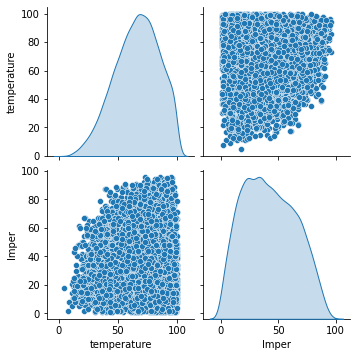

In [165]:
sns.pairplot(tempDF, diag_kind='kde')

In [166]:
imperviousData.shape

(218, 281)

In [167]:
lp2Data = processImage(revArea,0,0,242,312)
ah2Data = processImage(revAh, 0,0,242,312)
lb2Data = processImage(revLb, 0,0,242,312)

In [168]:
lp2Data.shape

(218, 281)

#Restrict the value in the data arrays to be in a valid domain. And make them into a datasat. (Pandas dataframe)

In [176]:
#Testing Michael's temperature data
valTemp = selectedTemp[(selectedTerrian > 0) & (selectedFor > 0) & (lp2Data > 10000) & (selectedTemp > 250)  & (selectedPopulation > 100)  & (imperviousData > 0) & (imperviousData < 100)]
valImper = imperviousData[(selectedTerrian > 0) & (selectedFor > 0) & (lp2Data > 10000) & (selectedTemp > 250)  & (selectedPopulation > 100)  & (imperviousData > 0) & (imperviousData < 100)]
valY = dataY[(selectedTerrian > 0) & (selectedFor > 0) & (lp2Data > 10000) & (selectedTemp > 250)  & (selectedPopulation > 100)  & (imperviousData > 0) & (imperviousData < 100)]
valX = dataX[(selectedTerrian > 0) & (selectedFor > 0) & (lp2Data > 10000) & (selectedTemp > 250)  & (selectedPopulation > 100)  & (imperviousData > 0) & (imperviousData < 100)]

In [177]:
valArea = lp2Data[(selectedTerrian > 0) & (selectedFor > 0) & (lp2Data > 10000) & (selectedTemp > 250)  & (selectedPopulation > 100)  & (imperviousData > 0) & (imperviousData < 100)]
valPopulation = selectedPopulation[(selectedTerrian > 0) & (selectedFor > 0) & (lp2Data > 10000) & (selectedTemp > 250)  & (selectedPopulation > 100)  & (imperviousData > 0) & (imperviousData < 100)]

In [178]:
valTerrian = selectedTerrian[(selectedTerrian > 0) & (selectedFor > 0) & (lp2Data > 10000) & (selectedTemp > 250) & (selectedPopulation > 100)  & (imperviousData > 0) & (imperviousData < 100) ]
valForest = selectedFor[(selectedTerrian > 0) & (selectedFor > 0) & (lp2Data > 10000) & (selectedTemp > 250) & (selectedPopulation > 100)  & (imperviousData > 0) & (imperviousData < 100)]

In [179]:
valAh = ah2Data[(selectedTerrian > 0) & (selectedFor > 0) & (lp2Data > 10000) & (selectedTemp > 250)  & (selectedPopulation > 100)  & (imperviousData > 0) & (imperviousData < 100)]
valLb = lb2Data[(selectedTerrian > 0) & (selectedFor > 0) & (lp2Data > 10000) & (selectedTemp > 250)  & (selectedPopulation > 100)  & (imperviousData > 0) & (imperviousData < 100)]

In [180]:
selectedForest.shape

(217, 280)

In [181]:
imperviousData.shape

(218, 281)

In [182]:
selectedTemp.shape

(218, 281)

In [183]:
tempDF = pd.DataFrame(data = valTemp, columns = ["temperature"])
tempDF.insert(1, 'Impervious', valImper, True)
tempDF.insert(2, 'Y', valY, True)
tempDF.insert(3, 'Area', valArea, True)
tempDF.insert(4, 'Population', valPopulation, True)
tempDF.insert(5, 'Terrain', valTerrian, True)
tempDF.insert(6, 'ForestHeight', valForest, True)
tempDF.insert(7, 'Ah', valAh, True)
tempDF.insert(8, 'Lb', valLb, True)
tempDF.insert(9, 'X', valX, True)

In [184]:
tempDF

,temperature,Impervious,Y,Area,Population,Terrain,ForestHeight,Ah,Lb,X
0,289.358816,1,2630258.89,10041.799805,136.272781,69,12,1.926580e+05,32737.829590,631504.163
1,289.269109,1,2630258.89,16673.509521,136.272781,78,12,3.001243e+05,47491.079590,632504.163
2,290.116758,3,2619258.89,11909.649658,228.211212,101,12,2.143745e+05,33922.199707,631504.163
3,289.682967,1,2618258.89,18369.834839,228.211182,70,12,3.424868e+05,56172.239502,633504.163
4,290.384309,4,2618258.89,11724.489746,373.748962,73,7,2.153416e+05,34744.609863,770504.163
...,...,...,...,...,...,...,...,...,...,...
4821,290.541970,1,2420258.89,15936.337566,174.624939,55,7,2.995414e+05,42754.380127,632504.163
4822,291.355578,1,2420258.89,25600.734741,174.624969,87,3,4.873806e+05,80138.610107,636504.163
4823,291.776267,1,2420258.89,90099.152953,148.403000,37,10,1.658231e+06,267658.234130,696504.163
4824,290.784353,1,2419258.89,27606.350265,174.624969,24,3,5.059182e+05,54253.640625,632504.163


#Shifting Pixels

In [ ]:
selectedTemp = NightImage[58:148,92:182] #The smaller range

In [ ]:
Rsquare = 0
for x in range(10):
  for y in range(10):
    selectedTemp = NightImage[58+y:148+y,92+x:182+x]
    valImper = imperviousData[(lp2Data > 10000) & (selectedTemp > 250) & (selectedPopulation > 0)  & (imperviousData > 0) & (imperviousData < 100)]
    valTemp = selectedTemp[(lp2Data > 10000) & (selectedTemp > 250) & (selectedPopulation > 0) & (imperviousData > 0) & (imperviousData < 100)]
    print(rsquared(valTemp,valImper))
    if (rsquared(valTemp,valImper) > Rsquare):
      Rsquare = rsquared(valTemp,valImper)
for x in range(10):
  for y in range(10):
    selectedTemp = NightImage[58-y:148-y,92-x:182-x]
    valImper = imperviousData[(lp2Data > 10000) & (selectedTemp > 250) & (selectedPopulation > 0)  & (imperviousData > 0) & (imperviousData < 100)]
    valTemp = selectedTemp[(lp2Data > 10000) & (selectedTemp > 250) & (selectedPopulation > 0) & (imperviousData > 0) & (imperviousData < 100)]
    print(rsquared(valTemp,valImper))
    if (rsquared(valTemp,valImper) > Rsquare):
      Rsquare = rsquared(valTemp,valImper)

In [ ]:
sns.pairplot(train_dataset[['temperature', 'Impervious']], diag_kind='kde')

In [ ]:
Rsquare

0.03307974417473138

In [ ]:
selectedTemp = NightImage[68:158,92:182]
valImper = imperviousData[(lp2Data > 10000) & (selectedTemp > 250) & (selectedPopulation > 0)  & (imperviousData > 0) & (imperviousData < 100)]
valTemp = selectedTemp[(lp2Data > 10000) & (selectedTemp > 250) & (selectedPopulation > 0) & (imperviousData > 0) & (imperviousData < 100)]
rsquared(valTemp,valImper)

0.017499767288027605

In [ ]:
dataY.shape

(90, 90)

In [ ]:
#Testing Michael's temperature data
valTemp = selectedTemp[(lp2Data > 10000) & (selectedTemp > 250) & (selectedPopulation > 0) & (imperviousData > 0) & (imperviousData < 100)]
valArea = lp2Data[(lp2Data > 10000) & (selectedTemp > 250) & (selectedPopulation > 0)  & (imperviousData > 0) & (imperviousData < 100)]
valImper = imperviousData[(lp2Data > 10000) & (selectedTemp > 250) & (selectedPopulation > 0)  & (imperviousData > 0) & (imperviousData < 100)]
valY = dataY[(lp2Data > 10000) & (selectedTemp > 250) & (selectedPopulation > 0)  & (imperviousData > 0) & (imperviousData < 100)]
valPopulation = selectedPopulation[(lp2Data > 10000) & (selectedTemp > 250)  & (selectedPopulation > 0)  & (imperviousData > 0) & (imperviousData < 100)]

In [ ]:
tempDF = pd.DataFrame(data = valTemp, columns = ["temperature"])
tempDF.insert(1, "lp2", valArea, True)
tempDF.insert(2, 'Impervious', valImper, True)
tempDF.insert(3, 'Y', valY, True)

#Linear Regression with least squares

In [1301]:
from sklearn.linear_model import LinearRegression

In [1302]:
reg = LinearRegression().fit(train_features, train_labels)

In [1303]:
reg.score(test_features, test_labels)

0.4567395627110364

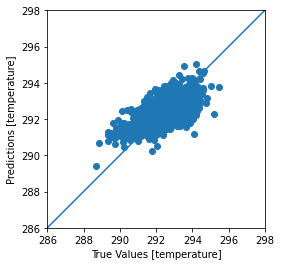

In [1304]:
test_predictions = reg.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [temperature]')
plt.ylabel('Predictions [temperature]')
lims = [286,298]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [1305]:
np.corrcoef(test_labels, test_predictions)

array([[1.        , 0.67758547],
       [0.67758547, 1.        ]])

#One variable Linear Regression

In [628]:
impervious_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
impervious_normalizer.adapt(train_features['Impervious'])

In [313]:
impervious_model = tf.keras.Sequential([
    impervious_normalizer,
    layers.Dense(units=1)
])

impervious_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_12 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [315]:
impervious_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [319]:
history = impervious_model.fit(
    train_features['Impervious'], train_labels,
    epochs=1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

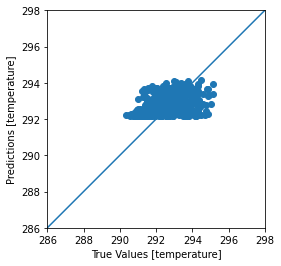

In [320]:
test_predictions = impervious_model.predict(test_features['Impervious']).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [temperature]')
plt.ylabel('Predictions [temperature]')
lims = [286,298]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
plot_horsepower(x,y)

#Linear Regression Modal

In [1291]:
train_dataset = tempDF.sample(frac=0.8, random_state=0)
test_dataset = tempDF.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('temperature')
test_labels = test_features.pop("temperature")
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [1292]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [1293]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [1294]:
linear_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_58 (Normalizat (None, 9)                 19        
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 10        
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [1295]:
history = linear_model.fit(
    train_features, train_labels, 
    epochs=1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

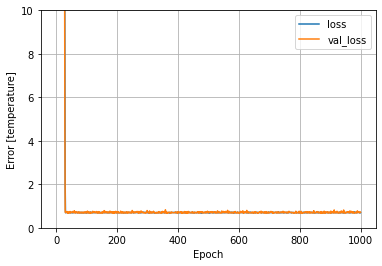

In [1296]:
plot_loss(history)

In [1297]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

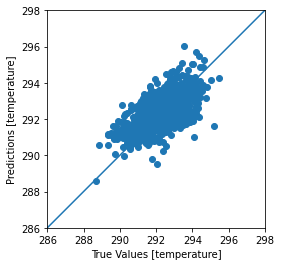

In [1298]:
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [temperature]')
plt.ylabel('Predictions [temperature]')
lims = [286,298]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [1299]:
np.corrcoef(test_labels, test_predictions)

array([[1.       , 0.6400432],
       [0.6400432, 1.       ]])

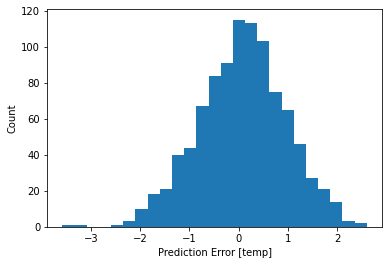

In [1300]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [temp]')
_ = plt.ylabel('Count')

#Construction of the model.

In [194]:
train_dataset = tempDF.sample(frac=0.8, random_state=0)
test_dataset = tempDF.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('temperature')
test_labels = test_features.pop("temperature")
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [195]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
temperature,2.923114e+02,1.113230e+00
Impervious,2.027868e+01,2.027418e+01
Y,2.534387e+06,3.964671e+04
Area,1.079579e+05,7.660505e+04
Population,3.352355e+03,7.048636e+03
Terrain,4.825563e+01,6.656627e+01
ForestHeight,2.659751e+01,3.839745e+01
Ah,2.189575e+06,1.707417e+06
Lb,3.708485e+05,3.386255e+05
X,7.602410e+05,5.600457e+04


In [196]:
#Single variable regression on imperviouss
impervious_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
impervious_normalizer.adapt(valImper)

In [197]:
#Single variable regression on lp2
lp2_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
lp2_normalizer.adapt(valArea)

In [198]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[     40.   2519258.89  161758.38    2914.42      24.         3.
  3322796.4   584049.43  848504.16]]

Normalized: [[ 0.97 -0.38  0.7  -0.06 -0.36 -0.61  0.66  0.63  1.58]]


In [199]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='MeanAbsoluteError',
                optimizer=tf.keras.optimizers.Adam(0.0005))
  return model

In [200]:
dnn_model = build_and_compile_model(normalizer)

In [201]:
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 9)                 19        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 884
Trainable params: 865
Non-trainable params: 19
_________________________________________________________________


#Training and Result.

In [1271]:
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=1000)

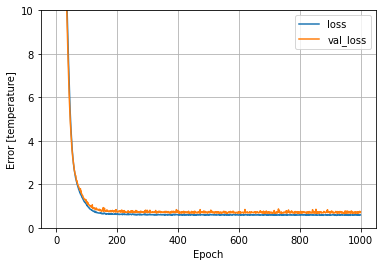

In [1272]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [temperature]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [1273]:
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [Temper]']).T

,Mean absolute error [Temper]
dnn_model,0.626347


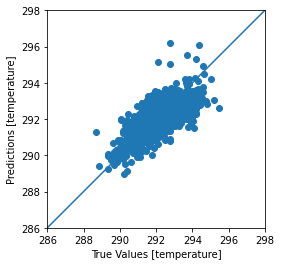

In [1285]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [temperature]')
plt.ylabel('Predictions [temperature]')
lims = [286,298]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [1286]:
np.corrcoef(test_labels, test_predictions)

array([[1.        , 0.71517678],
       [0.71517678, 1.        ]])

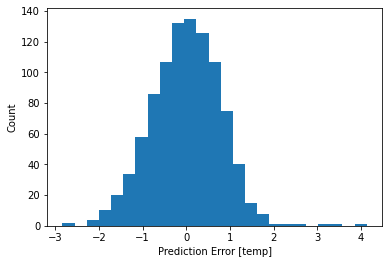

In [1287]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [temp]')
_ = plt.ylabel('Count')

#All Data in scatter plots.

In [ ]:
sns.pairplot(, diag_kind='scatter')

In [ ]:
sns.pairplot(train_dataset[['temperature', 'Impervious', 'Y', 'Lb']], diag_kind='kde')

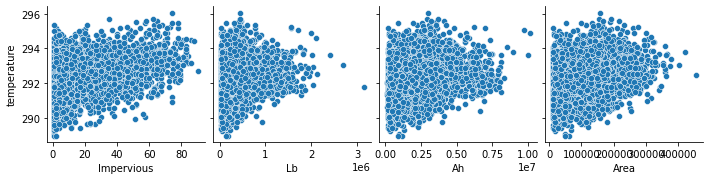

In [202]:
pp = sns.pairplot(data=train_dataset,
          y_vars=['temperature'],
          x_vars=['Impervious', 'Lb','Ah','Area'])

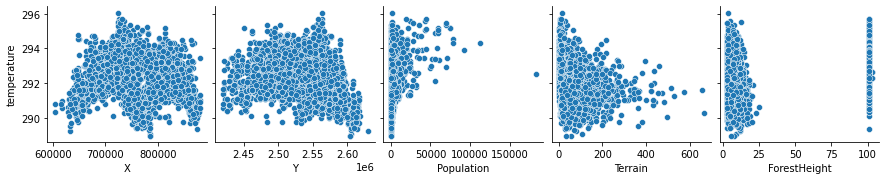

In [203]:
pp = sns.pairplot(data=train_dataset,
          y_vars=['temperature'],
          x_vars=['X', 'Y','Population','Terrain','ForestHeight'])

In [201]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

rsquared(train_dataset['temperature'], train_dataset['Impervious'])

0.1759236380251219

In [202]:
imperviousData.shape

(218, 281)

In [203]:
selectedTemp.shape

(218, 281)

In [204]:
valTemp = selectedTemp[(selectedTemp > 250) & (imperviousData > 0) & (imperviousData < 100)]

In [205]:
valimper = imperviousData[(selectedTemp > 250) & (imperviousData > 0) & (imperviousData < 100)]

In [206]:
rsquared(valTemp,valimper)

0.26749598515989526

#Export Model & Dataset

In [1288]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [ ]:
reloaded = tf.keras.models.load_model('dnn_model')

In [ ]:
test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [ ]:
tempDF.to_csv('Nightemp_All_variable_included.csv')
from google.colab import files
files.download('Nightemp_All_variable_included.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>